# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [2]:
#print actual path to the repertory
import os
os.getcwd()

'/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/TP2'

In [71]:
import warnings
warnings.filterwarnings("ignore")

# A- Multivariate data set : Fisher Iris

## 1

In [46]:
df = pd.read_csv('/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/TP2/iris.csv',sep=',')

In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,51,35,14,2
1,49,30,14,2
2,47,32,13,2
3,46,31,15,2
4,50,36,14,2


In [24]:
df.shape

(150, 4)

## 2

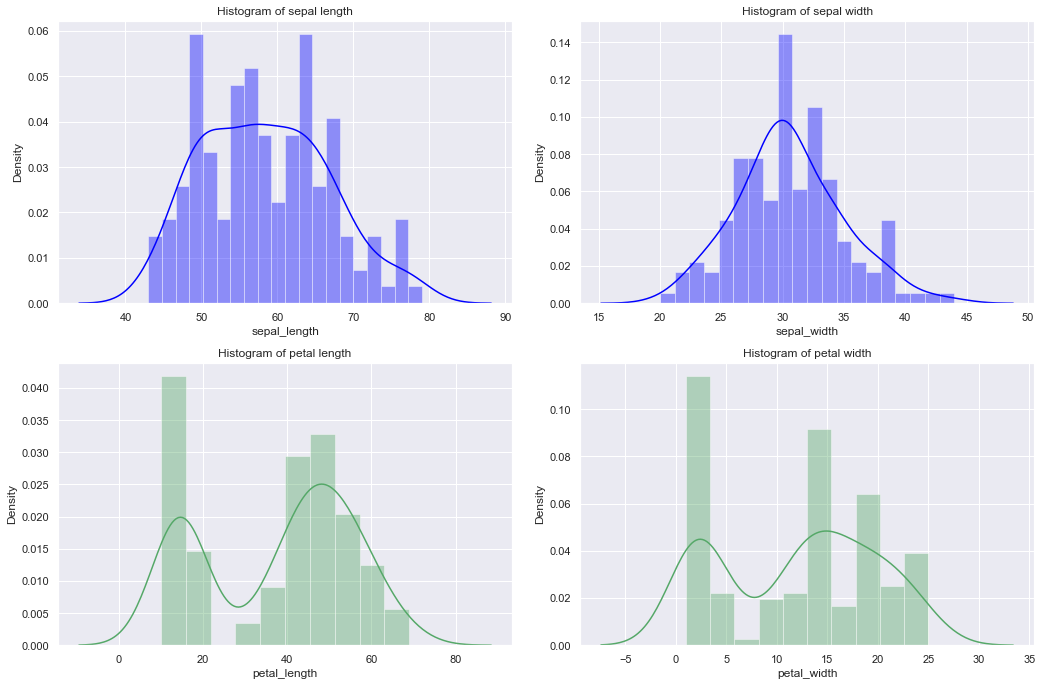

In [80]:
f, axes = plt.subplots(2,2, figsize=(15,10))
f.tight_layout(pad=3.0)
sns.distplot(df.sepal_length,bins=20,color='blue',ax=axes[0,0]).set(title='Histogram of sepal length');
sns.distplot(df.sepal_width,bins=20,color='blue',ax=axes[0,1]).set(title='Histogram of sepal width');
sns.distplot(df.petal_length,bins=10,color='g',ax=axes[1,0]).set(title='Histogram of petal length');
sns.distplot(df.petal_width,bins=10,color='g',ax=axes[1,1]).set(title='Histogram of petal width');

## 3

In [35]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


## 4

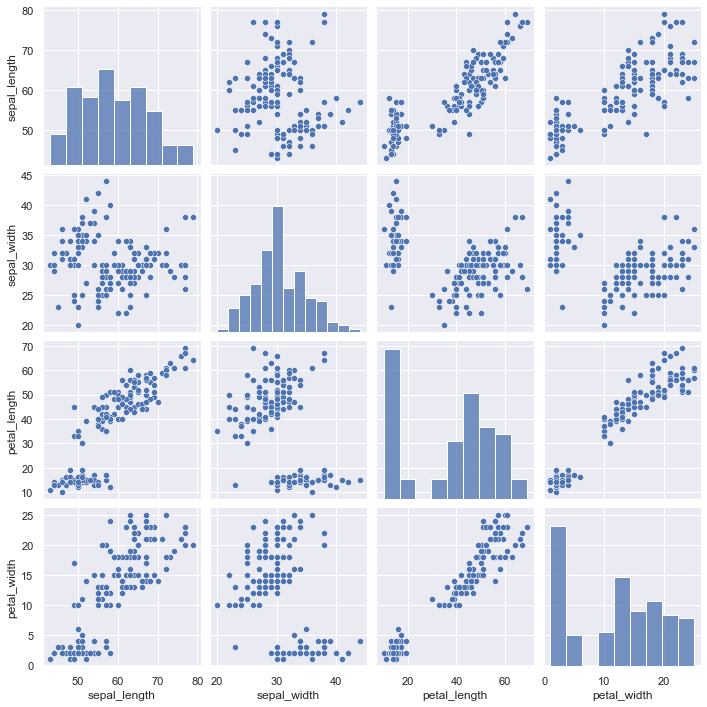

In [36]:
sns.pairplot(df)

<AxesSubplot:>

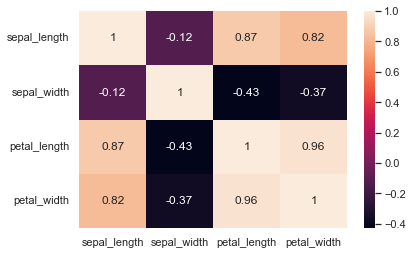

In [39]:
sns.heatmap(df.corr(),annot=True)

Thanks to this matrix, we can confirm the observations that we have seen previously. We find several strong correlations, the first between petal_width and petal_length, the second between sepal_length and petal_width and finally sepal_length and petal_length. The rest of the coefficients are very low.

## 5

In [41]:
from math import sqrt, log

corr_iris = df.corr()
sZ = sqrt(1/(len(df)-3))
Z = (np.log(1+corr_iris)-np.log(1-corr_iris))/2
Z_inf = Z - 1.96*sZ
Z_sup = Z + 1.96*sZ
inf = (np.exp(2*Z_inf)-1)/(np.exp(2*Z_inf)+1)
sup = (np.exp(2*Z_sup)-1)/(np.exp(2*Z_sup)+1)

print(inf)
print(sup)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length           NaN    -0.272696      0.827035     0.756896
sepal_width      -0.272696          NaN     -0.550879    -0.497215
petal_length      0.827035    -0.550879           NaN     0.949052
petal_width       0.756896    -0.497215      0.949052          NaN
              sepal_length  sepal_width  petal_length  petal_width
sepal_length           NaN     0.043515      0.905509     0.864837
sepal_width       0.043515          NaN     -0.287947    -0.218694
petal_length      0.905509    -0.287947           NaN     0.972985
petal_width       0.864837    -0.218694      0.972985          NaN


# B- Multivariate data set: Anthropometric data

## 1

In [49]:
df_mansize = pd.read_csv('/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/TP2/mansize.csv',sep=';')

In [51]:
df_mansize.head()

,Age,Height (cm),Weight (kg),Femur Length (cm),Feet Size (cm),Arm span (cm),Hand length (cm),Cranial volume (cm3),Penis size (cm)
0,21,195,71.0,59.4,30.0,203.2,22.6,1442,11.7
1,21,184,82.4,54.3,24.3,192.1,18.6,1366,12.8
2,18,169,96.7,45.1,21.5,176.2,16.6,1436,13.8
3,21,166,68.2,42.4,21.3,181.6,18.1,1375,14.8
4,18,175,56.5,46.9,24.9,183.9,19.1,1376,13.4


In [57]:
df_mansize.shape

(161, 9)

## 2

In [55]:
df_mansize.describe()

,Age,Height (cm),Weight (kg),Femur Length (cm),Feet Size (cm),Arm span (cm),Hand length (cm),Cranial volume (cm3),Penis size (cm)
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,20.447205,173.223602,73.357143,47.516149,24.967702,183.040994,18.885093,1418.105590,13.394410
std,1.676681,12.346546,14.160746,5.210949,2.703530,8.989101,1.247258,49.010535,1.481986
min,18.000000,150.000000,40.000000,37.100000,18.900000,159.600000,15.800000,1298.000000,9.100000
25%,19.000000,165.000000,63.100000,43.600000,23.100000,176.300000,18.200000,1382.000000,12.500000
50%,20.000000,172.000000,71.500000,47.400000,25.100000,181.700000,18.900000,1418.000000,13.400000
75%,22.000000,181.000000,81.100000,51.300000,26.700000,188.900000,19.800000,1450.000000,14.300000
max,24.000000,203.000000,115.200000,62.100000,32.200000,206.900000,22.600000,1558.000000,18.400000


## 3

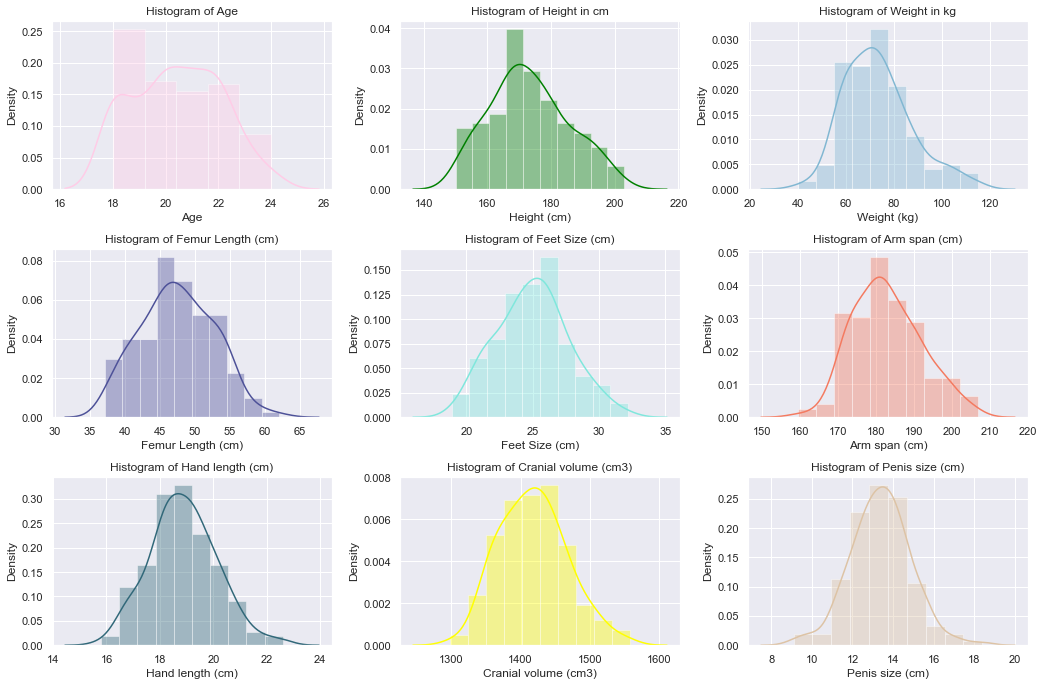

In [78]:
f, axes = plt.subplots(3,3, figsize=(15,10))
f.tight_layout(pad=3.0)
sns.distplot(df_mansize['Age'],bins=5,color='#ffcce7',ax=axes[0,0]).set(title='Histogram of Age');
sns.distplot(df_mansize['Height (cm)'],bins=10,color='green',ax=axes[0,1]).set(title='Histogram of Height in cm');
sns.distplot(df_mansize['Weight (kg)'],bins=10,color='#81b7d2',ax=axes[0,2]).set(title='Histogram of Weight in kg');
sns.distplot(df_mansize['Femur Length (cm)'],bins=10,color='#4d5198',ax=axes[1,0]).set(title='Histogram of Femur Length (cm)');
sns.distplot(df_mansize['Feet Size (cm)'],bins=10,color='#7fe7dc',ax=axes[1,1]).set(title='Histogram of Feet Size (cm)');
sns.distplot(df_mansize['Arm span (cm)'],bins=10,color='#f47a60',ax=axes[1,2]).set(title='Histogram of Arm span (cm)');
sns.distplot(df_mansize['Hand length (cm)'],bins=10,color='#316879',ax=axes[2,0]).set(title='Histogram of Hand length (cm)');
sns.distplot(df_mansize['Cranial volume (cm3)'],bins=10,color='yellow',ax=axes[2,1]).set(title='Histogram of Cranial volume (cm3)');
sns.distplot(df_mansize['Penis size (cm)'],bins=10,color='#ddc3a5',ax=axes[2,2]).set(title='Histogram of Penis size (cm)');


## 4

In [63]:
corr_mansize = df_mansize.corr()
print(corr_mansize)

                           Age  Height (cm)  Weight (kg)  Femur Length (cm)  \
Age                   1.000000     0.198026     0.146802           0.212554   
Height (cm)           0.198026     1.000000     0.591516           0.890573   
Weight (kg)           0.146802     0.591516     1.000000           0.517094   
Femur Length (cm)     0.212554     0.890573     0.517094           1.000000   
Feet Size (cm)        0.226708     0.802437     0.439485           0.754205   
Arm span (cm)         0.221791     0.903203     0.560522           0.823258   
Hand length (cm)      0.166387     0.791568     0.218642           0.742029   
Cranial volume (cm3)  0.178993     0.624609     0.599918           0.580032   
Penis size (cm)      -0.071679     0.127375     0.068403           0.100553   

                      Feet Size (cm)  Arm span (cm)  Hand length (cm)  \
Age                         0.226708       0.221791          0.166387   
Height (cm)                 0.802437       0.903203          0.

<AxesSubplot:>

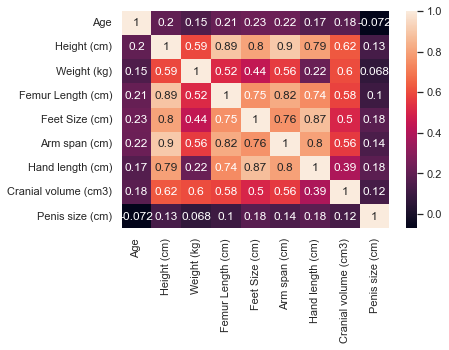

In [64]:
sns.heatmap(corr_mansize,annot=True)

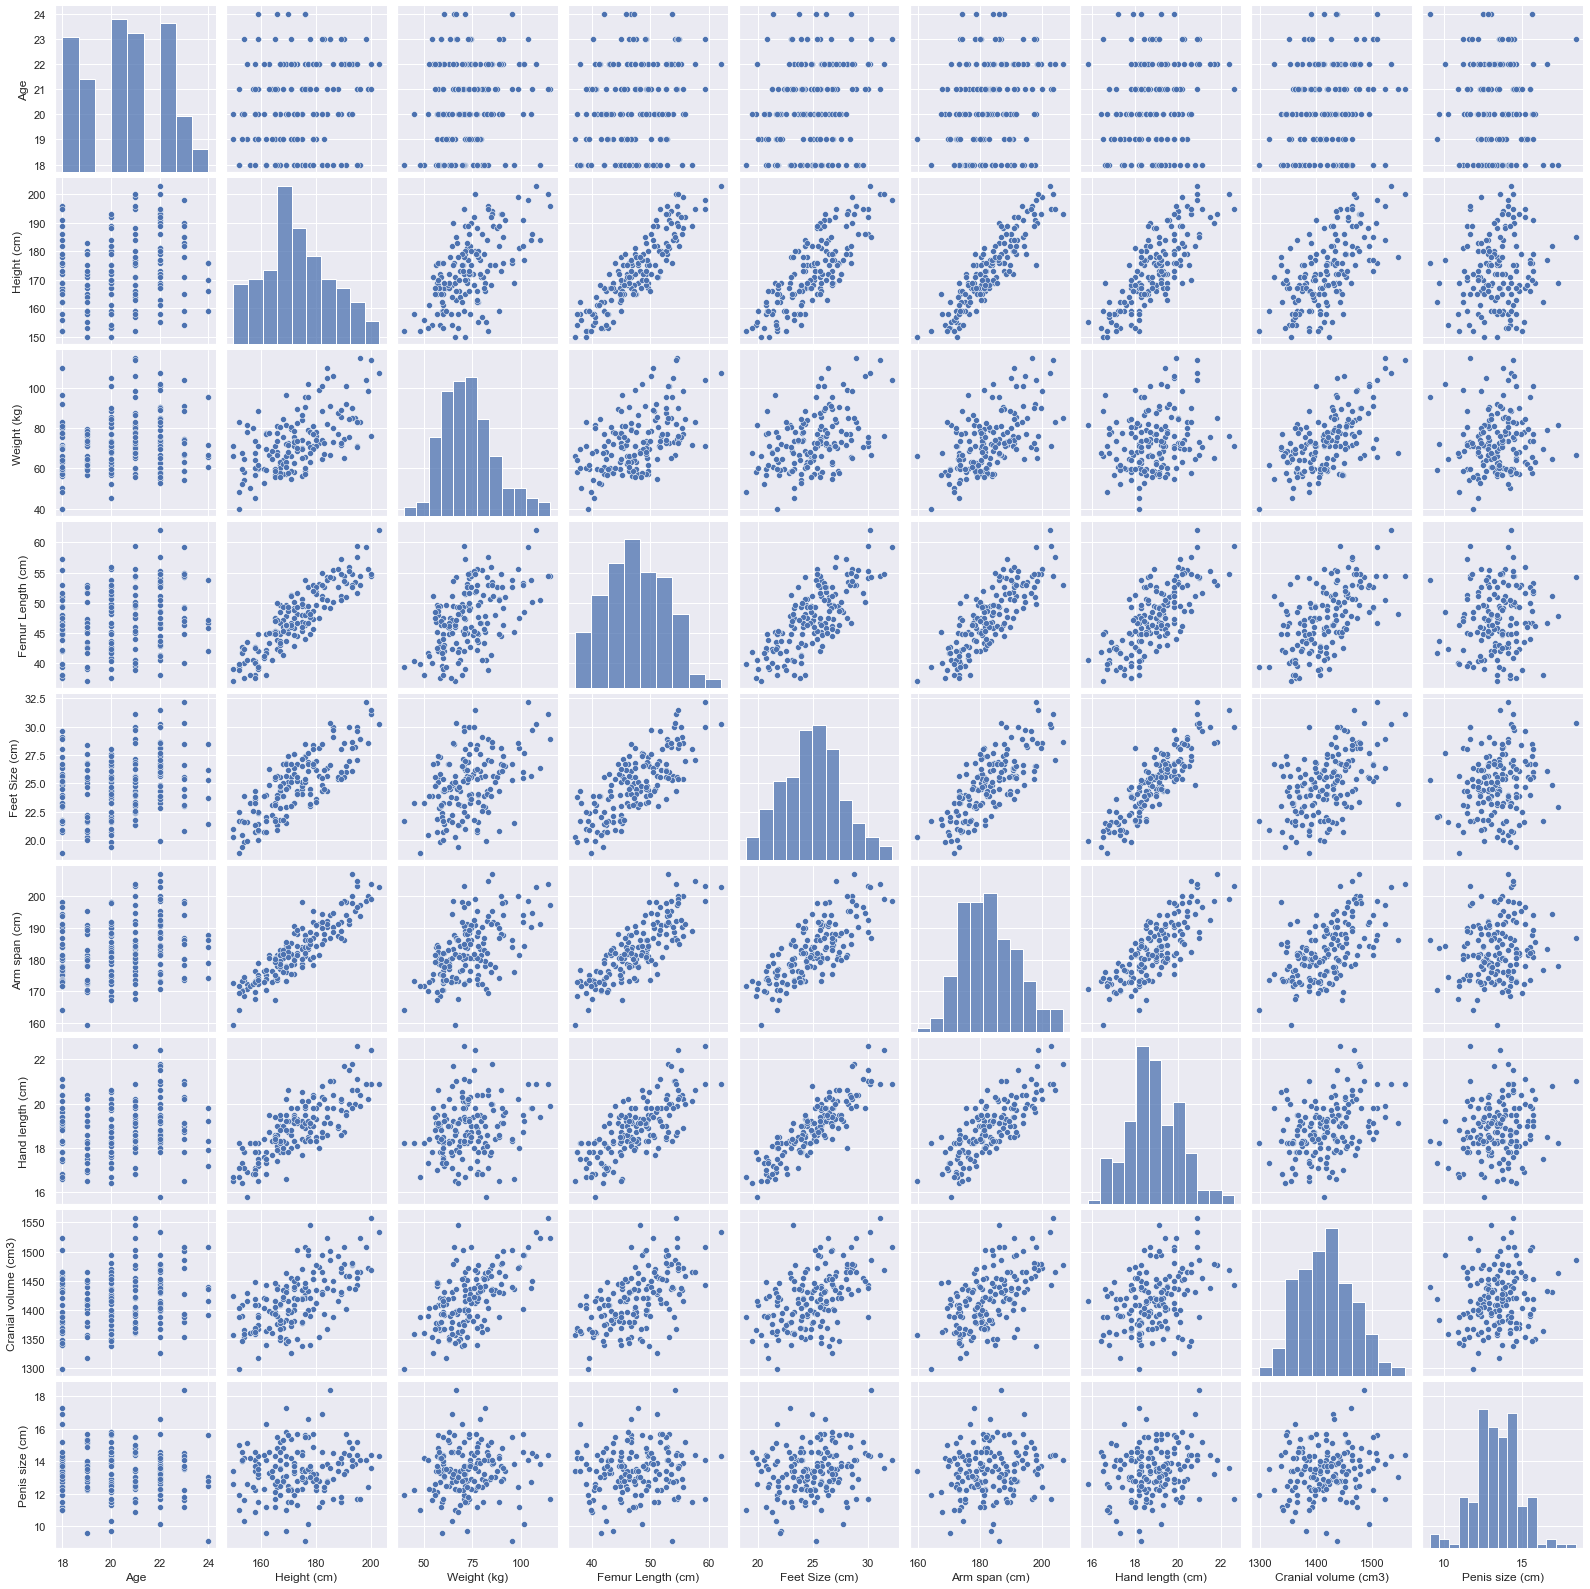

In [65]:
sns.pairplot(df_mansize)

## 5

In [68]:
sZ2 = sqrt(1/(len(df_mansize)-3))
Z2 = (np.log(1+corr_mansize)-np.log(1-corr_mansize))/2
Z_inf2 = Z2 - 1.96*sZ2
Z_sup2 = Z2 + 1.96*sZ2
inf2 = (np.exp(2*Z_inf2)-1)/(np.exp(2*Z_inf2)+1)
sup2 = (np.exp(2*Z_sup2)-1)/(np.exp(2*Z_sup2)+1)

print(inf2)
print(sup2)

                           Age  Height (cm)  Weight (kg)  Femur Length (cm)  \
Age                        NaN     0.044718    -0.008058           0.059844   
Height (cm)           0.044718          NaN     0.480831           0.853461   
Weight (kg)          -0.008058     0.480831          NaN           0.393923   
Femur Length (cm)     0.059844     0.853461     0.393923                NaN   
Feet Size (cm)        0.074648     0.739552     0.305580           0.678704   
Arm span (cm)         0.069498     0.870080     0.444371           0.766140   
Hand length (cm)      0.012019     0.725749     0.066203           0.663506   
Cranial volume (cm3)  0.025008     0.520188     0.490782           0.467277   
Penis size (cm)      -0.223875    -0.027851    -0.087197          -0.054979   

                      Feet Size (cm)  Arm span (cm)  Hand length (cm)  \
Age                         0.074648       0.069498          0.012019   
Height (cm)                 0.739552       0.870080          0.

## 6